In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train_ajEneEa.csv")
test = pd.read_csv("test_v2akXPA.csv")
output = pd.read_csv("sample_submission.csv")
print(train.shape)
print(test.shape)
output.dtypes

(43400, 12)
(18601, 11)


id        int64
stroke    int64
dtype: object

In [54]:
train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [135]:
train.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
12132,26911,Female,74.0,0,0,Yes,Self-employed,Urban,81.11,26.4,NaN,0
1638,59250,Female,78.0,0,0,Yes,Govt_job,Urban,58.88,35.8,NaN,0
14739,69338,Female,48.0,0,0,Yes,Private,Rural,110.59,28.1,formerly smoked,0
14849,68866,Female,43.0,0,0,Yes,Private,Urban,62.90,41.2,never smoked,0
22296,38614,Female,64.0,0,1,Yes,Private,Rural,223.83,38.0,NaN,0


In [23]:
train['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [108]:
train[train['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
10768,26188,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never smoked,0
15620,52984,Other,27.0,0,0,No,Private,Urban,62.45,NaN,smokes,0
15838,24893,Other,53.0,0,0,Yes,Private,Rural,89.65,NaN,NaN,0
19748,13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,formerly smoked,0
21041,31015,Other,19.0,0,0,No,Private,Rural,75.76,32.2,formerly smoked,0
21192,27043,Other,49.0,0,0,Yes,Private,Urban,94.88,37.2,never smoked,0
24252,51111,Other,51.0,0,0,Yes,Private,Rural,91.75,32.2,formerly smoked,0
26199,42452,Other,10.0,0,0,No,children,Rural,72.05,21.2,formerly smoked,0
26831,49812,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,NaN,NaN,0


In [122]:
train['gender'].replace('Other','Male', inplace=True)
train['gender'].value_counts()

Female    25665
Male      17735
Name: gender, dtype: int64

In [24]:
train['ever_married'].value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [25]:
train['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [27]:
train['Residence_type'].value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

In [28]:
train['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [79]:
train.apply(lambda x: sum(x.isnull()))

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

# Visualizing data

AttributeError: Unknown property style

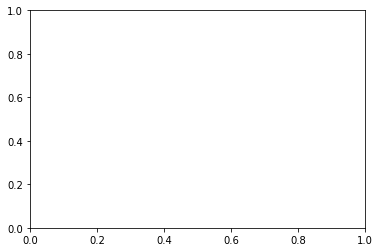

In [130]:
plt.scatter(x=train['avg_glucose_level'],y=train['bmi'],)

**replacing**

**1. smoking_status NA values with 'never smoked'**

**2. bmi with ffill**

In [137]:
train['smoking_status'].fillna('never smoked', inplace=True)
train['smoking_status'].value_counts()

never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [142]:
train['bmi'].ffill(inplace=True)
train.apply(lambda x: sum(x.isnull()))

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [147]:
test['smoking_status'].fillna('never smoked', inplace=True)
test['bmi'].ffill(inplace=True)
test.apply(lambda x: sum(x.isnull()))

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

# Label encoding

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def Encode(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c])
            df[c] = le.transform(df[c])
    return df


In [145]:
Xtrain = Encode(train)
Xtrain.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [148]:
Xtest = Encode(test)
Xtest.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
dtype: object

# Model

In [150]:
ytrain = Xtrain['stroke']
del Xtrain['stroke']

print(ytrain.shape)
print(Xtrain.shape)
print(Xtest.shape)

(43400, 11)
(43400,)
(18601, 11)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()